In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
# === CLASS ENCODING ===
# NO_ACTION = 0
# SHIELD = 1
# GRENADE = 2
# RELOAD = 3
# ENDING = 4

# === RAW DATA ===
# AccX
# AccY
# AccZ
# GyroX 
# GyroY
# GyroZ

In [3]:
DATA_DIR = 'data'
RAW = DATA_DIR + '/raw'

In [4]:
def mean(data):
    return np.mean(data)

def std(data):
    return np.std(data)

def iqr(data):
    '''
    calculate interquartile range
    '''
    q3, q1 = np.percentile(data, [75 ,25])
    return q3 - q1 

def mad(data, axis=None):
    '''
    calculate mean absolute deviation
    '''
    return np.mean(np.absolute(data - np.mean(data, axis)), axis)

In [5]:
sample_data = [[] for _ in range(6)]
    
with open(f'{RAW}/s11l.txt', 'r') as f:
    lines = f.readlines()
    for line in lines:
        data_point = map(float, line.split(','))
        for i, n in enumerate(data_point):
            sample_data[i].append(n)

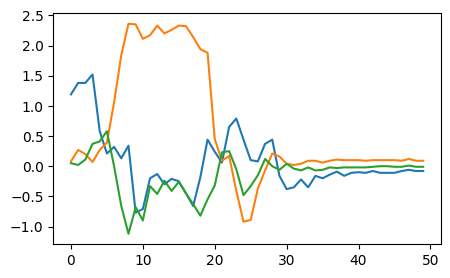

In [6]:
plt.figure(figsize=(5,3))
plt.plot(sample_data[0])
plt.plot(sample_data[1])
plt.plot(sample_data[2])
plt.show()

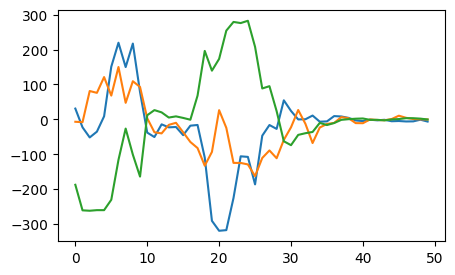

In [7]:
plt.figure(figsize=(5,3))
plt.plot(sample_data[3])
plt.plot(sample_data[4])
plt.plot(sample_data[5])
plt.show()

In [8]:
action_mapping = {'n': 0, 's':1, 'g':2, 'r':3, 'e':4}
data = []

for filename in os.listdir(RAW):
    if filename[-3:] == 'txt':
        single_action = [[] for _ in range(6)]
        single_action_tranform = []
        action = action_mapping[filename[0]]

        with open(f'{RAW}/{filename}', 'r') as f:
            lines = f.readlines()
            for line in lines:
                data_point = map(float, line.split(','))
                for i, n in enumerate(data_point):
                    single_action[i].append(n)

        for s in single_action:
            single_action_tranform.append(max(s))
            single_action_tranform.append(min(s))
            single_action_tranform.append(mean(s))
            single_action_tranform.append(std(s))
            single_action_tranform.append(iqr(s))
            single_action_tranform.append(mad(s))
        single_action_tranform.append(action)
        data.append(single_action_tranform)

In [9]:
df = pd.DataFrame.from_records(data)
df.rename(columns={36:'action'}, inplace=True)
df

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,action
0,0.38,-1.25,-0.1486,0.260584,0.2000,0.176368,1.00,-0.62,0.2296,0.345925,...,91.445241,63.1425,63.163216,75.21,-64.31,-0.2156,31.463270,36.6825,24.072720,4
1,1.49,-0.56,0.3650,0.428337,0.6000,0.356200,1.98,-1.01,0.4840,0.583246,...,57.220240,33.7325,38.486072,252.99,-257.09,1.7040,99.022346,24.8500,56.733280,3
2,1.88,-1.19,0.1028,0.543938,0.5375,0.396384,2.39,-0.70,0.6348,0.978933,...,78.921892,56.0350,53.068888,279.34,-261.97,6.2686,132.170703,52.4775,85.542720,1
3,0.68,-0.68,-0.0720,0.366742,0.4675,0.310560,2.37,-0.88,0.5438,0.761296,...,71.729739,37.2025,45.702152,249.49,-79.79,29.4950,69.158061,46.5125,47.329600,2
4,1.29,-0.74,-0.0104,0.468184,0.4825,0.363888,2.32,-0.65,0.5202,0.861038,...,60.105759,50.7600,42.814560,281.30,-259.96,10.0796,129.290661,40.5550,83.036384,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,1.22,-1.80,-0.0492,0.617170,0.4775,0.444576,2.14,-1.03,0.4872,0.620248,...,124.971301,124.3200,94.409872,283.61,-259.96,-10.5668,128.827590,86.1875,90.140672,2
156,0.28,-0.77,-0.1202,0.189742,0.1475,0.130608,0.76,-0.44,0.1812,0.279540,...,98.978455,50.8075,66.829648,62.37,-57.79,5.7340,25.378278,21.1250,17.982720,4
157,1.03,-1.04,-0.0602,0.398690,0.3250,0.275864,2.14,-0.67,0.4332,0.758740,...,64.722112,45.9625,42.454400,283.54,-257.92,5.5016,122.566786,34.4150,81.090976,1
158,2.00,-0.94,-0.0610,0.390309,0.1750,0.205240,1.63,-0.13,0.6770,0.605994,...,90.798987,31.2550,52.021488,116.26,-188.41,-14.7572,60.431317,16.2900,41.632144,3


In [10]:
shield_data = df[df['action'] == 1]
gre_data = df[df['action'] == 2]

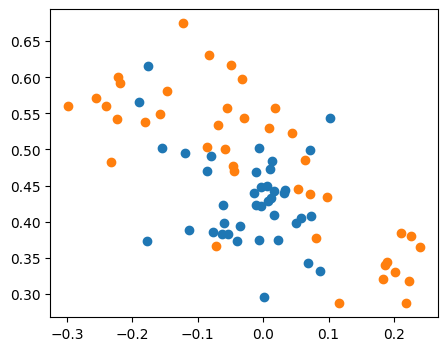

In [11]:
plt.figure(figsize=(5,4))
plt.scatter(shield_data[2], shield_data[3])
plt.scatter(gre_data[2], gre_data[3])

## Train model

In [12]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [13]:
NUM_FEATURES = 36

In [14]:
X = df[[x for x in range(NUM_FEATURES)]]
y = df['action']

In [15]:
y = y - 1 # using 0, 1 labels instead of 1, 2

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=42, shuffle=True
)

X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

In [31]:
train_df = X_train.copy()
train_df['action'] = y_train
test_df = X_test.copy()
test_df['action'] = y_test

train_df.to_csv(f'{DATA_DIR}/train.csv', index=False)
test_df.to_csv(f'{DATA_DIR}/test.csv', index=False)

In [19]:
len(y_train), len(y_test)

(128, 32)

In [20]:
input_size = 36
hidden_size = 20
num_classes = 4
num_epochs = 500
batch_size = 10
learning_rate = 0.01
device = torch.device('cpu')

In [21]:
class ImuDataset(torch.utils.data.Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    
    def __getitem__(self, index):
        return torch.Tensor(self.X.iloc[index].astype(float)), self.y[index]
    
    def __len__(self):
        return len(self.X)

In [22]:
train_dataset = ImuDataset(X_train, y_train)
test_dataset = ImuDataset(X_test, y_test)

train_loader = DataLoader(
    dataset=train_dataset, 
    batch_size=batch_size, 
    shuffle=True
)
test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False
)

In [23]:
class FCN(nn.Module):
    '''
    Fully connected network (MLP) with one hidden layer using ReLU activation function
    '''
    def __init__(self, input_size, hidden_size, num_classes):
        super(FCN, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out) 
        return out

In [24]:
model = FCN(input_size, hidden_size, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.5)

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sb

def test_conf_matrix(benchmark_loader, is_test_set=False):
    y_pred = []
    y_true = []
    
    with torch.no_grad():
        n_correct = 0
        n_samples = 0
        for data, labels in benchmark_loader:
            labels = labels.to(device)
            y_true.extend(labels)
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            y_pred.extend(predicted)
            n_samples += labels.size(0)
            n_correct += (predicted == labels).sum().item()

        acc = 100.0 * n_correct / n_samples
        if is_test_set:
            print(f'Accuracy on test set: {acc:.4f}%')
        else:
            print(f'Accuracy on train set: {acc:.4f}%')
        
        cf_mat = confusion_matrix(y_true, y_pred)
        cm_df = pd.DataFrame(cf_mat, index=[i for i in range(num_classes)], columns=[i for i in range(num_classes)])
        plt.figure(figsize=(4,3))
        sb.heatmap(cm_df, annot=True)

Before training
Accuracy on train set: 35.9375%
Accuracy on test set: 37.5000%


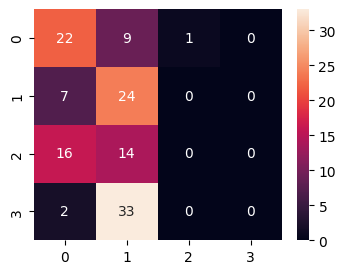

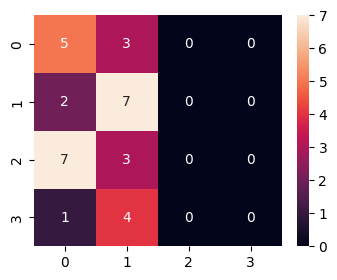

In [26]:
print('Before training')
test_conf_matrix(train_loader)
test_conf_matrix(test_loader, True)

In [27]:
losses = [] # to record loss over training time

for epoch in range(num_epochs):
    for i, (data, label) in enumerate(train_loader):
        label = label.to(device)
        output = model(data)
        loss = criterion(output, label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    
    scheduler.step()

    if epoch % 200  == 0:
        print(f'Epoch {epoch+1}/{num_epochs}: loss = {loss.item():.4f}', end='; ')
        print(f"learning rate = {optimizer.param_groups[0]['lr']}")

Epoch 1/500: loss = 1.6615; learning rate = 0.01
Epoch 201/500: loss = 0.0064; learning rate = 0.0025
Epoch 401/500: loss = 0.0026; learning rate = 0.000625


After training
Accuracy on train set: 100.0000%
Accuracy on test set: 100.0000%


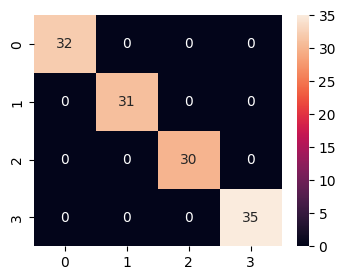

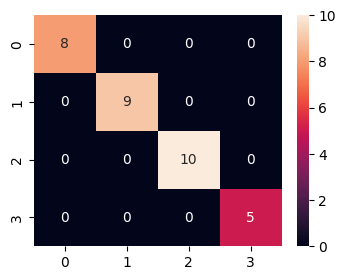

In [28]:
print('After training')
test_conf_matrix(train_loader)
test_conf_matrix(test_loader, True)

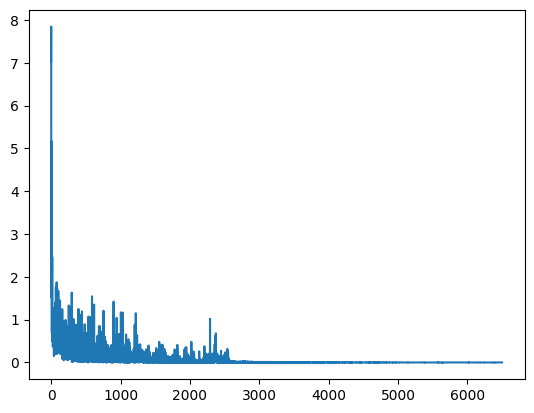

In [29]:
plt.plot(losses)

In [30]:
torch.save(model, 'model.pth')